# Project Part A: Exploratory Data Analysis

![](banner_project.jpg)

In [1]:
analyst = "Rachel Chen" # Replace this with your name

In [2]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
options(repr.matrix.max.rows=674)
options(repr.matrix.max.cols=200)
update_geom_defaults("point", list(size=1))                                

.................................................... start of document ....................................................

## Directions

### Objective

Conduct an exploratory data analysis of a dataset about public company fundamentals.  Later, use the insights gleaned along with additional analysis to recommend a portfolio of 12 company investments that maximizes 12-month return of an overall \$1,000,000 investment.

### Approach

Retrieve a public company fundamentals dataset comprising thousands of US companies from quarters 1, 2, 3, and 4 of year 2017 + company stock price data for those companies from quarter 4 of year 2018.

Transform the dataset representation to capture all information about any single company in a single observation.

Apply various descriptive statistics, data visualizations (including kernel density estimates), and cross-tabulations to look for interesting patterns and inter-company relationships.

### Data Source

The data includes these files:

* Data Dictionary.csv
* Company Fundamentals 2017.csv
* Company Fundamentals 2018.csv

The dataset and accompanying data dictionary was sourced from ...

* Wharton Research Data Services > Compustat - Capital IQ from Standard & Poor's > North America - Daily > Fundamentals Quarterly (https://wrds-www.wharton.upenn.edu/)

  * Date Variable: Data Date
  * Date Range: 2017-01 to 2017-12 -or- 2018-01 to 2018-12
  * Company Codes: Search the entire database
    * Consolidtaion Level: C, Output
    * Industry Format: INDL, FS, Output
    * Data Format: STD, Output
    * Population Source: D, Output
    * Quarter Type: Fiscal View, Output
    * Currency: USD, Output (not CAD)
    * Company Status: Active, Output (not Inactive)
  * Variable Types: Data Items, Select All (674)
  * Query output:
    * Output format: comma-delimited text
    * Compression type: None
    * Data format: MMDDYY10

The dataset is restricted to select US active, publicly held companies that reported quarterly measures including stock prices for 1st, 2nd, 3rd, and 4th quarters in years 2017 and 2018.  All non-missing stock prices exceed $3 per share.  File formats are all comma-separated values (CSV).

The data dictionary is from Variable Descriptions tab, copied to Excel, saved in csv format.

_**For this project, do not source any data from year 2019.**_

## Data

_<< Discuss this data retrieval. >>_

We have three csv files: Company Fundamentals 2017, Company Fundamentals 2018 and Data Dictionary. Data Dictionary provides the information about variables: variable name, data type and variable description. Then, we have the Company Fundamentals 2017 dataset. There are 8496 unique companies in current year dataset. There are more variables in the current year dataset than variables in the Data Dictionary file. Then, we partition the 2017 data by calendar quarter: q1, q2, q3 and q4. After the partition, we merge the four quarters' data into one dataframe with one row per each company, and remove any observations with missing prccq.q4 values. Then, we retrieve the company fundamentals data for calendar year 2018. For the data in year 2018, we select only observations with information reported in quarter 4. We filter out those observations with missing prccq values, and keep only the gvkey and prccq columns. Also, we remove any observations about companies that reported more than once per quarter. Finally, we merge the two datasets with information of 2017 and 2018 together, keeping only observations that have both 2017 and 2018 information and adding two synthetic variables "growth" and "big_growth" at the end. After this whole part of data retrieval, we have a cleaned dataframe with information of both 2017 and 2018, which should help us for further discussion and analysis.   

### Data Dictionary

Retrieve and present the data dictionary for the company fundamentals datasets.

In [3]:
# Retrieve the data dictionary.
# How many variable entries in the company fundamentals datasets?
# What are the variable names, types, and descriptions?

dictionary = read.csv("Data Dictionary.csv")
size(dictionary)
dictionary

observations,variables
674,4


Variable.Name,Data.Type,Variable.Description,Help
ACCHGQ,NUM,ACCHGQ -- Accounting Changes - Cumulative Effect,NA
ACCHGY,NUM,ACCHGY -- Accounting Changes - Cumulative Effect,NA
ACCTCHGQ,CHAR,ACCTCHGQ -- Adoption of Accounting Changes,NA
ACCTSTDQ,CHAR,ACCTSTDQ -- Accounting Standard,NA
ACOMINCQ,NUM,ACOMINCQ -- Accumulated Other Comprehensive Income (Loss),NA
ACOQ,NUM,ACOQ -- Current Assets - Other - Total,NA
ACTQ,NUM,ACTQ -- Current Assets - Total,NA
ADD1,CHAR,ADD1 -- Address Line 1,NA
ADD2,CHAR,ADD2 -- Address Line 2,NA
ADD3,CHAR,ADD3 -- Address Line 3,NA


### Data for Current Year

#### Retrieve Raw Data

Retrieve the company fundamentals data for calendar year 2017.

In [4]:
# Retrieve the 2017 data.
# How many observations and variables?
# What are the variable names?

datax = read.csv("Company Fundamentals 2017.csv", header=TRUE)
size(datax)
datax[1:3,]

observations,variables
33269,680


gvkey,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,cusip,conm,acctchgq,acctstdq,adrrq,ajexq,ajpq,bsprq,compstq,curcdq,curncdq,currtrq,curuscnq,datacqtr,datafqtr,finalq,ogmq,rp,scfq,srcq,staltq,updq,apdedateq,fdateq,pdateq,rdq,acchgq,acomincq,acoq,actq,altoq,ancq,anoq,aociderglq,aociotherq,aocipenq,aocisecglq,aol2q,aoq,apq,aqaq,aqdq,aqepsq,aqpl1q,aqpq,arcedq,arceepsq,arceq,atq,aul3q,billexceq,capr1q,capr2q,capr3q,capsftq,capsq,ceiexbillq,ceqq,cheq,chq,cibegniq,cicurrq,ciderglq,cimiiq,ciotherq,cipenq,ciq,cisecglq,citotalq,cogsq,csh12q,cshfd12,cshfdq,cshiq,cshopq,cshoq,cshprq,cstkcvq,cstkeq,cstkq,dcomq,dd1q,deracq,deraltq,derhedglq,derlcq,derlltq,diladq,dilavq,dlcq,⋯,srety,sstky,stkcoy,stkcpay,tdcy,tfvcey,tiey,tiiy,tsafcy,txachy,txbcofy,txbcoy,txdcy,txdiy,txpdy,txty,txwy,uaolochy,udfccy,udvpy,ufretsdy,ugiy,uniamiy,unopincy,unwccy,uoisy,updvpy,uptacy,uspiy,ustdncy,usubdvpy,utfdocy,utfoscy,utmey,uwkcapcy,wcapchy,wcapcy,wday,wddy,wdepsy,wdpy,xidocy,xidoy,xinty,xiy,xopry,xoptdqpy,xoptdy,xoptepsqpy,xoptepsy,xoptqpy,xopty,xrdy,xsgay,exchg,cik,costat,fic,cshtrq,dvpspq,dvpsxq,mkvaltq,prccq,prchq,prclq,adjex,add1,add2,add3,add4,addzip,busdesc,city,conml,county,dlrsn,ein,fax,fyrc,ggroup,gind,gsector,gsubind,idbflag,incorp,loc,naics,phone,prican,prirow,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
1004,02/28/2017,2016,3,5,INDL,C,D,STD,AIR,000361105,AAR CORP,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q1,2016Q3,Y,,Q,7,5,,3,02/28/2017,03/23/2017,03/21/2017,03/21/2017,0,-46.4,28.0,893.1,90.5,609.0,NA,0,0,-42.5,0,NA,248.5,194.6,NA,NA,NA,NA,NA,NA,NA,NA,1502.1,NA,NA,NA,NA,NA,NA,457.3,NA,885.7,10.1,10.1,13.7,-0.2,0,0,0,0.3,13.8,0,13.8,340.7,33.925,34.275,34.2,45.170,0.052,34.324,33.7,1,-0.1,45.2,0,2,NA,NA,NA,NA,NA,0,14.3,2,⋯,NA,5.3,7.6,NA,NA,NA,NA,NA,NA,NA,0,0,-1.7,NA,7.1,19.5,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-1.6,-0.4,3.8,0,1084.0,NA,NA,NA,NA,NA,NA,NA,126.6,11,1750,A,USA,11911652,0.075,0.075,1181.432,34.42,38.70,31.20,1,"One AAR Place, 1100 North Wood Dale Road",,,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,NA,01/01/1988
1004,05/31/2017,2016,4,5,INDL,C,D,STD,AIR,000361105,AAR CORP,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q2,2016Q4,Y,,Q,7,5,,3,05/31/2017,07/14/2017,07/12/2017,07/11/2017,0,-39.9,25.7,888.5,76.5,615.6,NA,0,0,-38.2,0,NA,254.1,177.4,NA,NA,NA,NA,NA,NA,NA,NA,1504.1,NA,NA,NA,NA,NA,NA,460.8,NA,914.2,10.3,10.3,21.2,2.2,0,0,0,4.3,27.7,0,27.7,372.6,33.900,34.300,34.3,45.175,0.096,34.354,33.8,1,-0.2,45.2,0,2,NA,NA,NA,NA,NA,0,16.1,2,⋯,NA,0.0,11.0,NA,NA,NA,NA,NA,NA,NA,0,0,0.6,12.5,NA,25.1,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-2.4,4.5,5.3,0,1511.1,NA,NA,NA,NA,NA,NA,NA,181.1,11,1750,A,USA,10061897,0.075,0.075,1200.329,34.94,36.47,31.97,1,"One AAR Place, 1100 North Wood Dale Road",,,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,NA,01/01/1988
1004,08/31/2017,2017,1,5,INDL,C,D,STD,AIR,000361105,AAR CORP,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q3,2017Q1,Y,,Q,7,5,,3,08/31/2017,09/21/2017,09/19/2017,09/19/2017,0,-39.0,33.7,904.7,114.0,627.0,NA,0,0,-37.9,0,NA,261.2,176.3,NA,NA,NA,NA,NA,NA,NA,NA,1531.7,NA,NA,NA,NA,NA,NA,460.3,NA,924.7,15.1,15.1,10.6,0.6,0,0,0,0.3,11.5,0,11.5,326.1,33.800,34.275,34.5,45.301,0.143,34.622,34.0,1,-0.1,45.3,0,2,NA,NA,NA,NA,NA,0,10.9,2,⋯,NA,6.5,2.6,NA,NA,NA,NA,NA,NA,NA,0,0,0.2,NA,1.3,4.4,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,N

In [5]:
# How many unique companies?

fmt(length(unique(datax$gvkey)), "unique companies in current year dataset")

unique companies in current year dataset
8496


In [6]:
# Which variables are listed in the data dictionary but not in the company fundamentals dataset (if any)?
# Which variables are listed in the company fundamentals dataset but not in the data dictionary (if any)?

layout(fmt(paste(setdiff(tolower(dictionary[,1]), colnames(datax)), collapse=" "), "more variables in data dictionary"),
       fmt(paste(setdiff(colnames(datax), tolower(dictionary[,1])), collapse=" "), "more variables in current year dataset"))

more variables in data dictionary
""
more variables in current year dataset
gvkey datadate indfmt consol popsrc datafmt curcdq costat


#### Partition Data by Calendar Quarter 

To partition the dataset by calendar quarter in which information is reported, first add a synthetic variable to indicate such.  Then partition into four new datasets, one for each quarter, and drop the quarter variables. Additionally, filter the observations to include only those with non-missing `prccq` $\geq$ 3.  Then remove any observations about companies that reported more than once per quarter.  Then change all the variable names (except for the `gvkey`, `tic`, and `conm` variables) by suffixing them with quarter information - e.g., in the Quarter 1 dataset, `prccq` becomes `prccq.q1`, etc.

In [7]:
# Partition the dataset as described.

datax$quarter = quarter(mdy(datax[,2]))

data.current.q1 = datax[(datax$quarter==1) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q2 = datax[(datax$quarter==2) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q3 = datax[(datax$quarter==3) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q4 = datax[(datax$quarter==4) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]

data.current.q1 = data.current.q1[!duplicated(data.current.q1$gvkey),]
data.current.q2 = data.current.q2[!duplicated(data.current.q2$gvkey),]
data.current.q3 = data.current.q3[!duplicated(data.current.q3$gvkey),]
data.current.q4 = data.current.q4[!duplicated(data.current.q4$gvkey),]

colnames(data.current.q1)[-c(1, 10, 12)] = paste0(colnames(data.current.q1)[-c(1, 10, 12)], ".q1")
colnames(data.current.q2)[-c(1, 10, 12)] = paste0(colnames(data.current.q2)[-c(1, 10, 12)], ".q2")
colnames(data.current.q3)[-c(1, 10, 12)] = paste0(colnames(data.current.q3)[-c(1, 10, 12)], ".q3")
colnames(data.current.q4)[-c(1, 10, 12)] = paste0(colnames(data.current.q4)[-c(1, 10, 12)], ".q4")

In [8]:
layout(fmt(size(data.current.q1)),
       fmt(size(data.current.q2)),
       fmt(size(data.current.q3)),
       fmt(size(data.current.q4)))

observations,variables
4324,680
observations,variables
4387,680
observations,variables
4397,680
observations,variables
4434,680


#### Consolidate Data by Company

Consolidate the four quarter datasets into one dataset, with one observation per company that includes variables for all four quarters.  Remove any observations with missing `prccq.q4` values.

In [ ]:
# Consolidate the partitions as described.
# How many observations and variables in the resulting dataset?
# Present the first few observations of the resulting dataset. 

m12 = merge(data.current.q1, data.current.q2, by=c("gvkey", "tic", "conm"), all=TRUE)
m34 = merge(data.current.q3, data.current.q4, by=c("gvkey", "tic", "conm"), all=TRUE)
data.current = merge(m12, m34, by=c("gvkey", "tic", "conm"), all=TRUE, sort=TRUE)

data.current = data.current[!is.na(data.current$prccq.q4),]

size(data.current)
data.current[1:3,] # fmt(data.current[1,]) would take a long time to display all columns

### Data for Next Year

#### Retrieve Raw Data

Retrieve the company fundamentals data for calendar year 2018.

In [ ]:
# Retrieve the 2018 data.
# How many observations and variables?
# What are the variable names?

datax = read.csv("Company Fundamentals 2018.csv", header=TRUE)
size(datax)
datax[1:3,]

#### Filter Data by Calendar Quarter 4 

To filter the dataset by calendar quarter in which information is reported, first add a synthetic variable to indicate such, and then select only observations with information reported in quarter 4. Additionally, filter the observations to include only those with non-missing `prccq`, and keep only the `gvkey` and `prccq` variables.  Then remove any observations about companies that reported more than once per quarter.

In [ ]:
# Filter the dataset as described.
# Present the first few observations of the resulting dataset. 

datax$quarter = quarter(mdy(datax[,2]))
data.future.q4 = datax[(datax$quarter==4) & !is.na(datax$prccq), c("gvkey", "prccq")]
data.future.q4 = data.future.q4[!duplicated(data.future.q4$gvkey),]
data.future.q4[1:6,]
size(data.future.q4)

### Data for Consolidated Current Year / Next Year

Consolidate the processed 2017 dataset and processed 2018 dataset, keeping only observations that have both 2017 and 2018 information.  Then add these 2 synthetic variables:

$\begin{align}
growth : & \, (prccq - prccq.q4) \div prccq.q4 \\
big\_growth : & \, growth \geq threshold
\end{align}$

In [ ]:
threshold = 0.3

In [ ]:
# Consolidate the datasets as described.
# How many observations and variables in the resulting dataset?
# How many predictor variables?
# How many outcome variables?
# Present the first few observations of the resulting dataset.

data = merge(data.current, data.future.q4, by="gvkey", all=FALSE)

data$growth = (data$prccq - data$prccq.q4) / data$prccq.q4
data$big_growth = factor(data$growth >= threshold, levels=c(FALSE, TRUE), labels=c("NO", "YES"))

size(data)
data[1:3,]

## Exploratory Data Analysis

_<< Discuss this exploratory data analysis and what insights you gleaned from it. >>_

DESCRIPTIVE STATISTICS:

The dataframe we examine is called "data", which has 4305 observations and 2714 variables. Then, we compute the statistics for the "growth" variable in the dataframe, which shows a mean value of -0.1185887, for example. Then, we compute the correlation between prccq.q4 and prccq and the correlation between prccq.q4 and growth. We can see from the result that there is a super high correlation between prccq.q4 and prccq, and there is a super low correlation between prccq.q4 and growth. After that, we compute the fraction of observations that have missing price data, which gives a result of 8.57%. This suggests that only a small amount of observations have missing data on price. 

Then, I generate three other interesting descriptive statistics. The first one is the difference in growth between companies that have the highest and lowest growth over the two years. This results in a value of around 11.24. The second one is the variety of statistics about differences between prccq.q1 and prccq.q4 for all the companies. From the summary table, we can see that the range of the difference is pretty high. The third one is the fraction of observations that have big growth. The resulted fraction is around 0.084, which suggests that only a small amount of companies have big growth. 

From all the descriptive statistics above, we can see that: 1) More than half of the companies have negative growth. 2) There are some companies that have extremely high growth. 3) Since the correlation between prccq.q4 and prccq is very high (close to 1), we may introduce dimension reduction in future stage. 4) When doing analysis in future steps, we should keep in mind that there are missing values we need to deal with. 5) The price difference between first quarter and fourth quarter in 2017 can be very large. 6) Only a small proportion of companies has big growth. 

DATA VISUALIZATION:

The first plot we draw is a barchart to visualize growth across companies. From the graph, we can see that most of the companies seem to lie within the two extremes (most negative and most positive). The second plot we draw is a scatterplot to visualize correlation of price at Q4 next year vs. price at Q4 current year. We can see from the graph that it seems to exhibit a positive correlation, though most of the points are gathering at the bottom left.
The third plot we draw is a scatterplot to visualize correlation of growth vs. price at Q4 current year. We can see from the graph that the two variables have a very low correlation, and most of the points are gathering at the bottom left as well. The fourth plot we draw is a barchart to visualize the amount of missing data across variables. From the graph, we can see that most of the variables have more than 500 hundred missing values. The fifth plot is a barchart that visualizes of variance across variables (for numeric variables with variance≤1000). We can see from the graph that around 100 variables have variances between 250 and 1000. Then, we have a 3D scatterplot projection that visualizes revtq.q4 vs. prccq.q4 vs. growth (for revtq.q4≤1000, prccq.q4≤100, and -1≤growth≤5). From the 3D plot, we can see that most of the points are concentrated around the (0,0,-1) point. 

Then, I generate several other interesting data visualization. First of all, I generate a scatterplot to visualize correlation of price at Q4 current year vs. diffnum (from 3.1). We can see from the scatterplot that while most of the diffnum values are within -250 and 250, the prices at Q4 current year are more spread out along the x-axis. Also, these two variables seem less correlated. Secondly, I generate a 3D scatterplot projection to visualize prccq.q1 vs. prccq.q4 vs. prccq. Interestingly, we can see from the plot that each pair of the variables seem to be highly correlated with each other. Thirdly, I generate a scatterplot that visualizes correlation of atq.q1 vs. growth. From the graph, we can see that most of the companies have less than 25000 total asset and a growth that is less than 2. And these two variables seem to have very little correlation. 

### Descriptive Statistics

In [ ]:
# How many observations and variables?

size(data)

In [15]:
# Present a variety of statistics about growth. 

growth = describe(data$growth)
fmt(growth)

vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
1,4305,-0.1185887,0.4689029,-0.1492019,-0.1518854,0.2629342,-0.9956,10.24283,11.23843,6.579551,102.5556,0.0071465


In [16]:
# What is the correlation between prccq.q4 and prccq?
# What is the correlation between prccq.q4 and growth?

prccq.q4_prccq = cor(data$prccq.q4, data$prccq)
prccq.q4_growth = cor(data$prccq.q4, data$growth)
correlation = data.frame(prccq.q4_prccq = prccq.q4_prccq, prccq.q4_growth = prccq.q4_growth)
fmt(correlation)

prccq.q4_prccq,prccq.q4_growth
0.9602728,0.0088286


In [17]:
# What fraction of observations are missing price data (i.e., prccq.q1, prccq.q2, prccq.q3, prccq.q4)?

newdata = data[, c("prccq.q1", "prccq.q2", "prccq.q3", "prccq.q4")]
fraction = sum(!complete.cases(newdata))/nrow(data)
fmt(fraction, "fraction of observations with missing price data")

fraction of observations with missing price data
0.0857143


In [18]:
# Present some additional interesting statistics.
# The growth difference between companies that have the highest and lowest growth over the two years

maxgrowth = data[which.max(data$growth),]$growth
mingrowth = data[which.min(data$growth),]$growth
range = maxgrowth - mingrowth
fmt(range)

range
11.23843


In [19]:
# Present some additional interesting statistics. 
# The variety of statistics about differences between prccq.q1 and prccq.q4 for all the companies

diff14 = data[, c("prccq.q1", "prccq.q4")]
diffnum = diff14$prccq.q4 - diff14$prccq.q1
diffnumnew = describe(diffnum)
fmt(diffnumnew, "price difference between the fourth quarter and the first quarter")

vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
1,3978,6.119425,80.89601,1.55,2.911709,5.656119,-432,4650,5082,48.97107,2751.354,1.28261


In [20]:
# Present some additional interesting statistics.
# The fraction of observations that have big growth

bg = sum(as.numeric(data$big_growth) - 1)/nrow(data)
fmt(bg, "fraction of observations that have big growth")

fraction of observations that have big growth
0.0836237


### Data Visualization

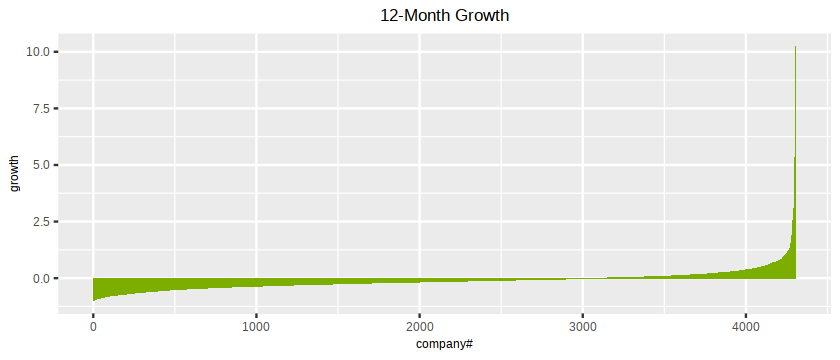

In [21]:
# Present a barchart to visualize growth across companies (sorted lowest to highest).
data3.21 = data.frame(index = as.numeric(row.names(data)), growth = sort(data[, "growth"]))
ggplot(data3.21) + ggtitle("12-Month Growth") + xlab("company#") + ylab("growth") +
geom_col(aes(x = index, y = growth))

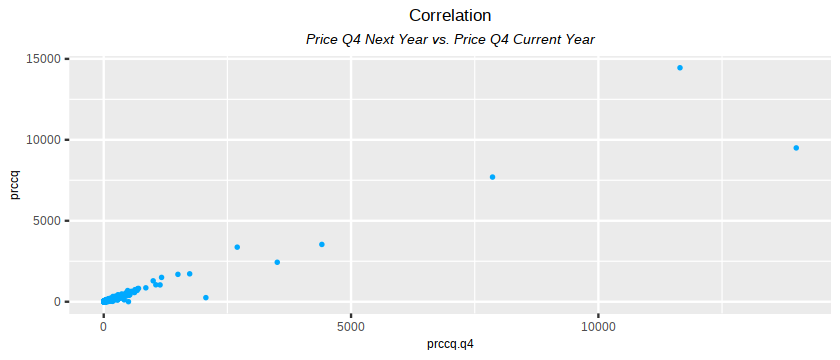

In [22]:
# Present a scatterplot to visualize correlation of price at Q4 next year vs. price at Q4 current year.
ggplot(data) + ggtitle("Correlation", subtitle = "Price Q4 Next Year vs. Price Q4 Current Year") +
geom_point(aes(x = prccq.q4, y = prccq), size = 0.5)

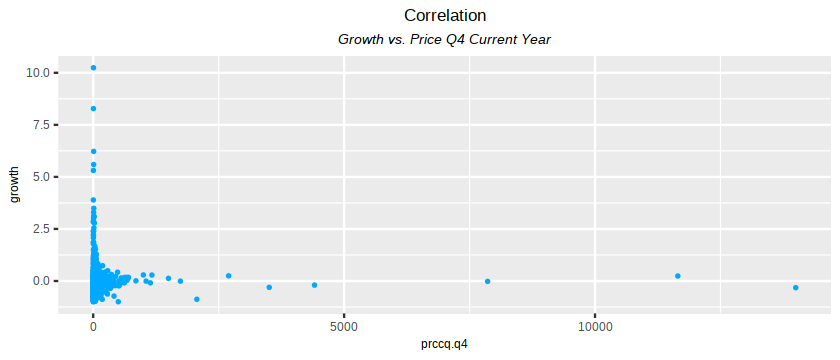

In [23]:
# Present a scatterplot to visualize correlation of growth vs. price at Q4 current year.
ggplot(data) + ggtitle("Correlation", subtitle = "Growth vs. Price Q4 Current Year") +
geom_point(aes(x = prccq.q4, y = growth), size = 0.5)

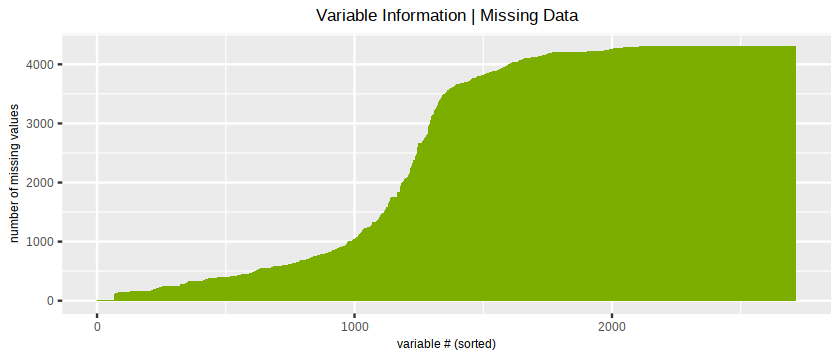

In [24]:
# Present a barchart to visualize the amount of missing data across variables
# (variables on the horizontal axis sorted by most complete to least complete,
#  number of missing values on the vertical axis).
#
# You can use the var_info.na_count() function. 

missing = data.frame(missing = sort(var_info.na_count(data)))
missing$index = 1:nrow(missing)

ggplot(missing) + ggtitle("Variable Information | Missing Data") + xlab("variable # (sorted)") + 
    ylab("number of missing values") + 
    geom_col(aes(x = index, y = missing)) +
    scale_fill_manual(values = PALETTE[3], drop = FALSE) +
    theme.legend_title

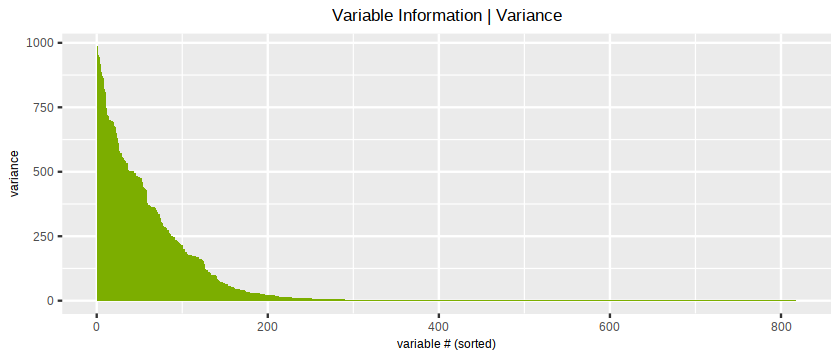

In [25]:
# Present a barchart to visualize of variance across variables
# (for numeric variables with variance≤1000 computed by excluding missing data,
#  sorted highest to lowest).
#
# You can use the var_info.var() function.
variance = data.frame(variance = sort(var_info.var(data), decreasing = TRUE)) 
variance = variance[variance <= 1000, ]
variance = data.frame(variance = variance)
variance$index = 1:nrow(variance)

ggplot(variance) + ggtitle("Variable Information | Variance") + xlab("variable # (sorted)") + 
    ylab("variance") + 
    geom_col(aes(x = index, y = variance)) +
    scale_fill_manual(values = PALETTE[3], drop = FALSE) +
    theme.legend_title

In [26]:
# Present a 3D scatterplot projection to visualize revtq.q4 vs. prccq.q4 vs. growth
# (for revtq.q4≤1000, prccq.q4≤100, and -1≤growth≤5).
newdata = na.omit(data[, c("revtq.q4", "growth", "prccq.q4")])
newdata = newdata[(newdata$revtq.q4 <= 1000) & (newdata$prccq.q4 <= 100) & (newdata$growth >= -1) & (newdata$growth <= 5), ]

p = open3d(); view3d(-20, -4, zoom = 0.65)
plot3d(newdata[, c("revtq.q4", "prccq.q4", "growth")], type = "s", size = 1, col = PALETTE[1], xlim = c(0, 1000), ylim = c(0, 100), zlim = c(-1, 5))
grid3d(c("x", "y", "z"))
rglwidget(elementId = "myplot4", width = 400, height = 400, reuse = FALSE)

HTML widgets cannot be represented in plain text (need html)

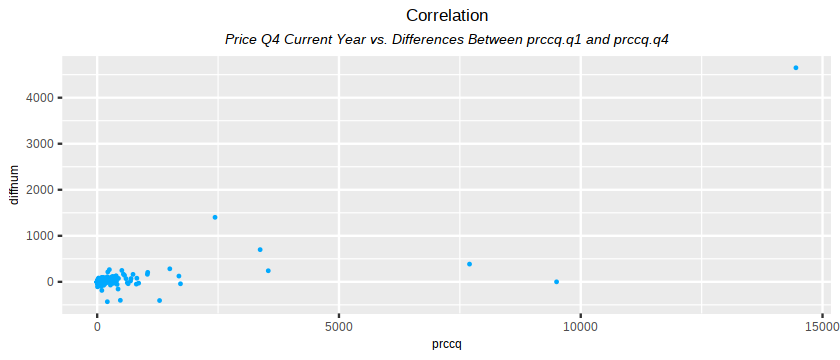

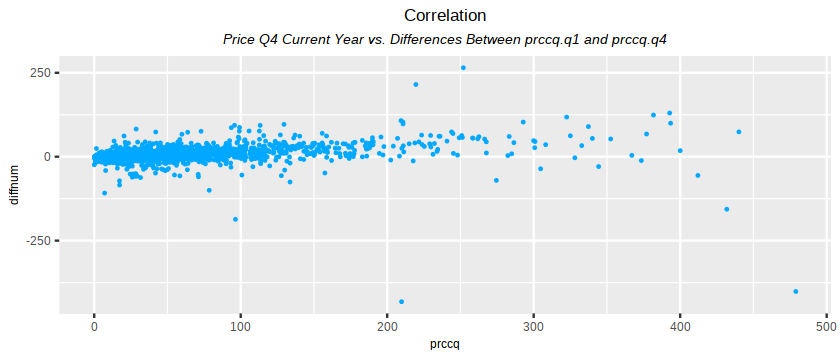

In [27]:
# Present some additional interesting data visualizations. 
# Present a scatterplot to visualize correlation of price at Q4 current year vs. diffnum (from 3.1).
datahere = na.omit(data.frame(prccq = data[, "prccq"], diffnum = diffnum))

ggplot(datahere) + ggtitle("Correlation", subtitle = "Price Q4 Current Year vs. Differences Between prccq.q1 and prccq.q4") +
geom_point(aes(x = prccq, y = diffnum), size = 0.3)

# remove outliers and look only the range of price between 0 to 500.
datahere1 = datahere[datahere$prccq <= 500, ]

ggplot(datahere1) + ggtitle("Correlation", subtitle = "Price Q4 Current Year vs. Differences Between prccq.q1 and prccq.q4") +
geom_point(aes(x = prccq, y = diffnum), size = 0.3)

In [28]:
# Present some additional interesting data visualizations. 
# Present a 3D scatterplot projection to visualize prccq.q1 vs. prccq.q4 vs. prccq
# (for prccq.q1≤100, prccq.q4≤100, and prccq≤100).
newdatahere = na.omit(data[, c("prccq.q1", "prccq.q4", "prccq")])
newdatahere = newdatahere[(newdatahere$prccq.q1 <= 100) & (newdatahere$prccq.q4 <= 100) & (newdatahere$prccq <= 100), ]

p = open3d(); view3d(-20, -4, zoom = 0.65)
plot3d(newdatahere[, c("prccq.q1", "prccq.q4", "prccq")], type = "s", size = 1, col = PALETTE[2])
grid3d(c("x", "y", "z"))
rglwidget(elementId = "myplot5", width = 400, height = 400, reuse = FALSE)

HTML widgets cannot be represented in plain text (need html)

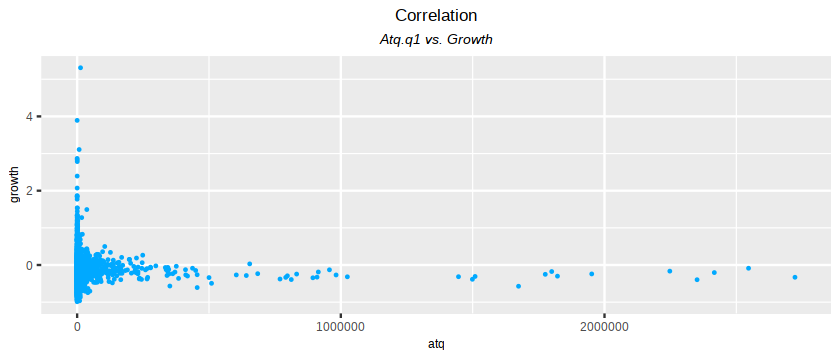

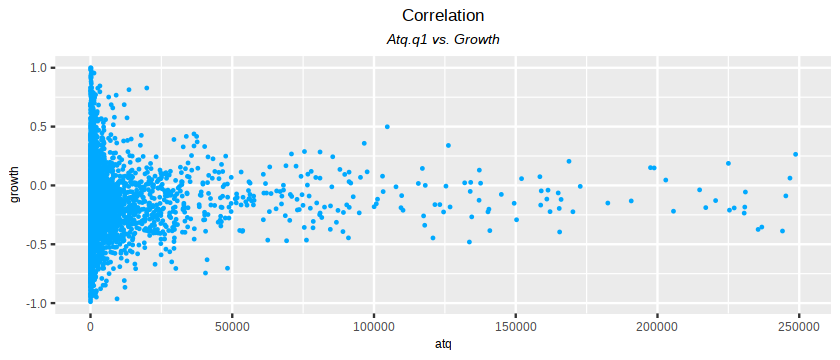

In [29]:
# Present some additional interesting data visualizations. 
# Present a scatterplot to visualize correlation of atq.q1 vs. growth.
datalast = na.omit(data.frame(atq = data[, "atq.q1"], growth = data[, "growth"]))

ggplot(datalast) + ggtitle("Correlation", subtitle = "Atq.q1 vs. Growth") +
geom_point(aes(x = atq, y = growth), size = 0.3)

# remove outliers and look only the range of growth between -1 to 1 and atq less than or equal to 250000.
datalast1 = datalast[(datalast$growth <= 1) & (datalast$growth >= -1) & (datalast$atq <= 250000), ]

ggplot(datalast1) + ggtitle("Correlation", subtitle = "Atq.q1 vs. Growth") +
geom_point(aes(x = atq, y = growth), size = 0.3)

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised May 26, 2020
</span>
</p>
</font>